## <font color = red> *** FILL HERE *** </font>
Jeremias Shadbolt <br>
1900386 <br>
jrshad@utu.fi  <br>
21.11.-22  <br>


------

# Data Analysis and Knowledge Discovery: Exercise 2, Supervised learning

The previous exercise was about <i>data understanding</i> and <i>data preparation</i>, which formed the basis for the modeling phase of the data mining process. Many modeling techniques make assumptions about data so the exploration and preparation phases can't be ignored. Now, as we have checked the validity of data and familiarized ourselves with it, we can move on to the next stage of the Cross-Industry Standard Process for Data Mining (CRISP-DM) which is <font color = darkorchid><i>modeling</i></font>.

The questions to be answered at this stage could be for example:

- What kind of model architecture best fits our data?
- How well does the model perform technically?
- Could we improve that performance?
- How the performance of the model is evaluated?

<i>Machine learning</i> is a subfield of artificial intelligence which provides automatic, objective and data-driven techniques for modeling the data. The machine learning algorithms aim to learn from data to make predictions. The two main branches of it are <i>supervised learning</i> and <i>unsupervised learning</i>.  In this exercise, we are going to use the former -- <font color = darkorchid><i>supervised learning</i></font> -- for classification and regression tasks.

For classification, data remains the same as in the previous exercise, but I've already cleaned it up for you. Some data pre-processing steps are still required to ensure that it's in an appropriate format, so that models can learn something from it. Even though we are not doing any major data exploration nor data preparation here this time, <i>you should <b>never</b> forget it in your future data analyses</i>.

-----

<b>General guidance for exercises</b>

- Answer <b>all</b> questions below, even if you can't get your script to fully work.
- Write clear and easily readable code, and include explanations what your code does
- Make informative illustrations: include labels for x and y axes, legends and captions for your plots.
- You can add more code and markup cells, as long as the flow of the notebook stays readable and logical.
- Before saving the ipynb file (and possible printing) run: "Restart & Run all", to make sure you return a file that works as expected.
- Grading: *Fail*/*Pass*/*Pass with honors* (+1)
- +1 bonus point (grading *Pass with honors*) requires a <b>completely</b> correct solution and also thorough analysis.
- If you encounter problems, Google first. If you can't find an answer to the problem, don't hesitate to ask in the Moodle discussion or directly via moodle chat or email from the course assistants.
- Note! Don't leave it to the last moment! No feedback service during weekends.

<font color = red size = 4><b>The deadline is 28 November at 18:00</b></font>. Late submissions will not be accepted unless there is a valid excuse for extending the deadline before the due date.

------

### Gather **all** packages needed for this notebook here:

You can use other packages as well, but this excercise can be completed with those below.

In [3]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt

# Machine learning package - scikit-learn
from sklearn import metrics
from sklearn.preprocessing import StandardScaler, scale
from sklearn.model_selection import train_test_split, cross_val_score, LeaveOneOut, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.linear_model import Ridge

# Show the plots inline in the notebook
%matplotlib inline

______________
## <font color = lightcoral>1. Classification using k-nearest neighbors </font> 

We start exploring the world of data modeling by using <font color = darkorchid><b>K-Nearest Neightbors (k-NN) algorithm</b></font>. The k-NN algorithm is one of the classic supervised machine learning algorithms. It assumes that similar points are close to each other. 

In our case, we'll use the k-NN algorithm to **predict the presence of cardiovascular disease** using all the other variables as <font color = darkorchid><b>features</b></font> in the given data set. So, the target variable is <font color = darkorchid><b>cardio</b></font>.

But first, we need data for the task. The code for loading the data into the environment is provided for you. <font color = red>The code should work, but make sure, that you have the csv file of the data in the same directory where you have this notebook file.</font> 

***Exercise 1 A)*** 

Print the first 10 rows to check that everything is ok with the created dataframe.

*note: as said, the data remains the same, but cholesterol has been one-hot-encoded for you already. There's also a new variable gluc (about glucose levels), which is one-hot-encoded for you. It has the similar values as cholesterol originally does [normal, at risk, elevated]. Also, binary variables have been changed to [0,1] values.*


In [2]:
### Loading code provided
# ------------------------------------------------------
# The data file should be at the same location than the 
# exercise file to make sure the following lines work!
# Otherwise, fix the path.
# ------------------------------------------------------

# Path for the data
data_path = 'ex2_cardio_data.csv'

# Create a dataframe
cardio_data = pd.read_csv(data_path, dtype='int')

In [3]:
### Code - 10 first row

# display the first 10 rows
cardio_data.head(10)

,age,sex,height,weight,ap_hi,ap_lo,smoke,alco,active,cardio,cholesterol_at_risk,cholesterol_elevated,cholesterol_normal,gluc_at_risk,gluc_elevated,gluc_normal
0,22767,0,162,75,120,80,0,0,1,0,0,0,1,0,0,1
1,19102,0,164,80,140,90,0,0,1,0,0,0,1,0,0,1
2,23251,0,155,76,130,80,0,0,1,0,0,0,1,0,1,0
3,22651,1,169,65,120,80,0,0,1,0,0,0,1,0,0,1
4,21770,1,171,67,160,100,0,0,0,1,0,0,1,0,0,1
5,14651,1,170,70,120,80,0,0,1,0,0,0,1,0,0,1
6,17391,0,152,65,110,70,0,0,1,0,0,0,1,0,0,1
7,14792,0,165,65,120,70,0,0,1,0,0,0,1,0,0,1
8,15982,1,180,81,110,70,1,0,1,0,0,0,1,0,0,1
9,19589,0,156,60,120,90,0,0,1,0,0,0,1,0,0,1


There seems to be a column named _alco_ which wasn't introduced in the markdown before nor in the dataset in exc1. I'm assuming it's alcohol consumption

----

We have the data so let's make use of it. 

To teach the k-NN algorithm (or any kind of machine learning algorithm) to recognize patterns, we are going to need <font color = darkorchid><b>training data</b></font>. But to test how well a model possibly learned those patterns, we'll need <font color = darkorchid><b>test data</b></font> which is new and unseen for the trained model. Keep in mind that the test set is not shown for the model before we are actually done with training. 

So, to **find the estimate for the performance of a model**, we are going to use this <font color = darkorchid><b>train-test split</b></font>. "Split" because we literally split the data into two sets.

Sometimes <font color = darkorchid>stratification</font> needs to be considered. It can be used to ensure that train and test sets contain the same proportions of samples of each target class as the original data set.

***Exercise 1 B)*** 

Gather the features as an array `features`, and the target variable as an array `labels`. Produce training and test data.  Divide the data **randomly** into training (80%) and test (20%) sets.

- Would it be a good idea to use stratification? **Explain** your decision.

In [4]:
# extract features as an array
features = list(cardio_data[[column for column in cardio_data.columns if column != 'cardio']])

# extract target variable as an array
labels = ['cardio']

In [5]:
# verify arrays
print(features)
print(labels)

['age', 'sex', 'height', 'weight', 'ap_hi', 'ap_lo', 'smoke', 'alco', 'active', 'cholesterol_at_risk', 'cholesterol_elevated', 'cholesterol_normal', 'gluc_at_risk', 'gluc_elevated', 'gluc_normal']
['cardio']


In [6]:
### Code - Train-test split
# split cardio_data into training and test sets with 20 % of test data. 
# data is divided randomly by default
x_train, x_test, y_train, y_test = train_test_split(cardio_data[features], cardio_data[labels], test_size = 0.2, stratify = cardio_data[labels])


In [7]:
# verify split is done correctly
print(f"amount of x_training data: {len(x_train)} which is {(len(x_train) / len(cardio_data[features]) * 100)} % of feature data")
print(f"amount of x_test data: {len(x_test)} which is {(len(x_test) / len(cardio_data[features]) * 100)} % of feature data")


print(f"amount of Y_training data: {len(y_train)} which is {(len(y_train) / len(cardio_data[labels]) * 100)} % of label data")
print(f"amount of y_test data: {len(y_test)} which is {(len(y_test) / len(cardio_data[labels]) * 100)} % of label data")


display(x_train.head())
display(x_test.head())
display(y_train.head())
display(y_test.head())

amount of x_training data: 800 which is 80.0 % of feature data
amount of x_test data: 200 which is 20.0 % of feature data
amount of Y_training data: 800 which is 80.0 % of label data
amount of y_test data: 200 which is 20.0 % of label data


,age,sex,height,weight,ap_hi,ap_lo,smoke,alco,active,cholesterol_at_risk,cholesterol_elevated,cholesterol_normal,gluc_at_risk,gluc_elevated,gluc_normal
866,16902,0,166,82,110,70,0,0,1,0,0,1,0,0,1
788,20753,0,165,64,130,70,0,0,1,0,0,1,0,0,1
908,14691,0,158,75,120,80,0,0,1,0,0,1,0,0,1
592,15411,1,169,80,110,70,0,0,1,0,0,1,0,0,1
105,19659,0,155,78,120,80,0,1,1,0,0,1,1,0,0


,age,sex,height,weight,ap_hi,ap_lo,smoke,alco,active,cholesterol_at_risk,cholesterol_elevated,cholesterol_normal,gluc_at_risk,gluc_elevated,gluc_normal
0,22767,0,162,75,120,80,0,0,1,0,0,1,0,0,1
904,14386,0,161,106,110,70,0,0,1,0,0,1,0,0,1
312,15235,0,158,53,110,70,0,0,0,0,0,1,0,0,1
382,18891,1,161,60,130,80,1,0,1,0,0,1,0,0,1
638,15382,1,178,65,100,70,0,0,1,0,0,1,0,0,1


,cardio
866,0
788,1
908,0
592,0
105,1


,cardio
0,0
904,0
312,0
382,1
638,0



    Stratification ensures the data is split according to a column. Now since we've got so little data, it's in our best interest to ensure they're split in relation to our target value just so we ensure neither the training or test data is biased towards either way. 
    For example, if variable y is a binary categorical variable with values 0 and 1 and there are 25% of zeros and 75% of ones, stratify = y will make sure that your random split has 25% of 0's and 75% of 1's.
    
    If we didn't stratify there'd be a chance the data is biased towards either direction if there's significantly more of either target value in the testing or training set

----------

***Exercise 1 C)*** 

Scale the numeric features. 

- Remind yourself briefly why you need this step. 
- What can you say about scaling especially from the perspective of the k-NN algorithm?

*tip: You should now have **two** variables where you have the features divided into. Don't forget to scale the test data. Some good information about preprocessing and how to use it for train and test data can be found https://scikit-learn.org/stable/modules/preprocessing.html.*

In [8]:
# numeric features to ease data handling
numeric_features = ['age', 'height', 'weight', 'ap_hi', 'ap_lo']
numeric_features

['age', 'height', 'weight', 'ap_hi', 'ap_lo']

In [9]:
### Code - Standardization

x_train[numeric_features] = scale(x_train[numeric_features])
x_test[numeric_features] = scale(x_test[numeric_features])

# StandardScaler was giving NaN's for some reason so I'll just use Scale. They're essentially the same, even
# thought StandardScaler implemetns the Transformer API and scale is just a function

In [10]:
# verify
display(x_train.head())
display(x_test.head())

display(x_train[numeric_features].describe().T)
display(x_test[numeric_features].describe().T)

,age,sex,height,weight,ap_hi,ap_lo,smoke,alco,active,cholesterol_at_risk,cholesterol_elevated,cholesterol_normal,gluc_at_risk,gluc_elevated,gluc_normal
866,-0.864899,0,0.215598,0.586100,-0.918434,-1.133770,0,0,1,0,0,1,0,0,1
788,0.653060,0,0.086207,-0.644198,0.378675,-1.133770,0,0,1,0,0,1,0,0,1
908,-1.736414,0,-0.819531,0.107651,-0.269880,-0.061394,0,0,1,0,0,1,0,0,1
592,-1.452610,1,0.603771,0.449401,-0.918434,-1.133770,0,0,1,0,0,1,0,0,1
105,0.221835,0,-1.207704,0.312701,-0.269880,-0.061394,0,1,1,0,0,1,1,0,0


,age,sex,height,weight,ap_hi,ap_lo,smoke,alco,active,cholesterol_at_risk,cholesterol_elevated,cholesterol_normal,gluc_at_risk,gluc_elevated,gluc_normal
0,1.330891,0,-0.315492,0.246508,-0.273738,0.035307,0,0,1,0,0,1,0,0,1
904,-1.893993,0,-0.443741,2.687959,-0.943025,-1.182162,0,0,1,0,0,1,0,0,1
312,-1.567310,0,-0.828488,-1.486135,-0.943025,-1.182162,0,0,0,0,0,1,0,0,1
382,-0.160536,1,-0.443741,-0.934840,0.395548,0.035307,1,0,1,0,0,1,0,0,1
638,-1.510747,1,1.736491,-0.541057,-1.612311,-1.182162,0,0,1,0,0,1,0,0,1


,count,mean,std,min,25%,50%,75%,max
age,800.0,4.030110e-16,1.000626,-1.880681,-0.728515,-0.005208,0.809152,1.773692
height,800.0,-1.196820e-15,1.000626,-4.442480,-0.690140,0.086207,0.603771,3.967938
weight,800.0,2.042810e-16,1.000626,-2.216246,-0.644198,-0.165749,0.449401,6.600893
ap_hi,800.0,2.731149e-16,1.000626,-2.864097,-0.269880,-0.269880,0.378675,4.918555
ap_lo,800.0,-5.750955e-16,1.000626,-2.206146,-0.061394,-0.061394,-0.061394,4.228111


,count,mean,std,min,25%,50%,75%,max
age,200.0,3.330669e-16,1.002509,-1.924006,-0.717994,0.132093,0.758619,1.670271
height,200.0,-1.021405e-15,1.002509,-2.367476,-0.700239,0.069254,0.710499,2.249487
weight,200.0,-3.930190e-16,1.002509,-2.194943,-0.698570,-0.147275,0.640290,4.420602
ap_hi,200.0,-1.998401e-16,1.002509,-2.281598,-0.273738,-0.273738,0.395548,4.411268
ap_lo,200.0,7.616130e-16,1.002509,-2.399631,0.004870,0.035307,0.035307,4.905182


<font color = red> \*** Answer here - why standardization? ***
    
    k-NN uses distance measure, therefore larger values will be dominant and cause the algorithm to not work correctly. If we didn't scale, for example the age value would be dominant over, say, weight and negatively impact our work

-------

It's time for us to train the model!

***Exercise 1 D)*** 

Train a k-NN model with $k=3$. Print out the confusion matrix.
- What can you say about the confusion matrix?
- How does the model perform with the different classes? Where do you think the differences come from?
- What is the total classification accuracy? How would you interpret it?
- Perform also the following:
    - Make 1000 **different** train and test set splits.
    - Run the k-NN model (with $k=3$) for each split and save its accuracy.  
    - Plot accuracies in a histogram.
    - Discuss your results


*tip: `sklearn.metrics.classification_report` is a great way to build up a text report showing the main classification metrics*

In [11]:
### Code - kNN classifier
# model with K = 3

# i used .values.ravel() to flatten the data. Knn gave some warning about shape when i used plain y_train so this fixed it
knn = KNeighborsClassifier(n_neighbors = 3).fit(x_train, y_train.values.ravel()) #
y_pred = knn.predict(x_test)

              precision    recall  f1-score   support

           0       0.79      0.89      0.84       143
           1       0.60      0.42      0.49        57

    accuracy                           0.76       200
   macro avg       0.70      0.65      0.67       200
weighted avg       0.74      0.76      0.74       200



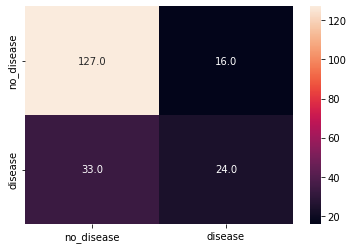

In [12]:
# confusion matrix
metrics.confusion_matrix(y_test, y_pred)

class_names = ['no_disease', 'disease']
confusion_matrix = pd.DataFrame(metrics.confusion_matrix(y_test, y_pred), columns = class_names, index = class_names)
sns.heatmap(confusion_matrix, annot = True, fmt = '.1f')
print(metrics.classification_report(y_test, y_pred))

KNN was able to classify all 200 records with an accuracy of 79 %. For instance, from report we can see that class 1 (disease) had the lowest precision of 60 %.
We can also interpret the results from the heatmap; a person with no disease was mistaken for a person with disease 16 times, whereas no disease was correctly classified in 127 cases. We labeled 33 people with a disease to having no disease.

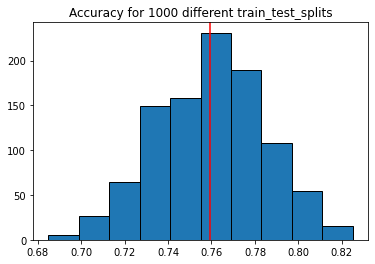

In [13]:
#### Code - 1000 different train-test-splits

accuracies = list()
for test_run in range(1, 1001, 1):
    x_train_2, x_test_2, y_train_2, y_test_2 = train_test_split(cardio_data[features], cardio_data[labels], test_size = 0.2, stratify = cardio_data[labels])
    x_train_2[numeric_features] = scale(x_train_2[numeric_features])
    x_test_2[numeric_features] = scale(x_test_2[numeric_features])
    knn_2 = KNeighborsClassifier(n_neighbors = 3)
    knn_2.fit(x_train_2, y_train_2.values.ravel())
    y_pred_2 = knn_2.predict(x_test_2)
    accuracies.append(metrics.accuracy_score(y_test_2, y_pred_2))

# plot accuracies
plt.hist(accuracies, edgecolor = 'black')
plt.axvline(np.mean(accuracies), color = 'red')
plt.title("Accuracy for 1000 different train_test_splits")
plt.show()

<font color = red> \*** Answer here - Discuss your results. What can you see? What do you think is relevant? \*** 
    
    It'd seem that the accuracy we got in the first run falls around the mean accuracy we've got from 1000 runs. There seemed to be a few cases where accuracy was >80 % as well as sub 70 %. The thing relevant here is that with random sampling we're reaching an average accuracy of around 76 % (as marked with the red line), which is good enough imo. I'd still like to see how the model would improve if we had, say, 10k samples worth of data although i doubt the accuracy would improve much.   

------

One really common evaluation metric is <font color = darkorchid><b>the area under the receiver operating characteristic (AUROC or AUC-ROC)</b></font>.

***Exercise 1 E)*** 

Explain what information you can learn about the one k-NN model you trained by using AUROC. Also, evaluate the performance by computing  the metric and plotting the related curve. Draw also the line for random guesses.

- How would you interpret the results?

In [26]:
# roc_curve and AUC
from sklearn.metrics import roc_curve, auc

In [50]:
### Code - AUROC and ROC Curves
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, y_pred)

In [51]:
roc_auc = auc(false_positive_rate, true_positive_rate)

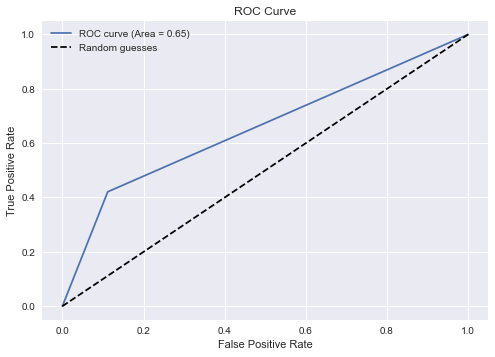

In [72]:
plt.figure()
plt.plot(false_positive_rate, true_positive_rate, label = f'ROC curve (Area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label = 'Random guesses')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

<font color = red> \*** Answer here - Explain the results ***  </font>

It'd seem that the model was quite trash since the area is .65. According to https://www.sciencedirect.com/science/article/pii/S1556086415306043#:~:text=AREA%20UNDER%20THE%20ROC%20CURVE,-AUC%20is%20an&text=In%20general%2C%20an%20AUC%20of,than%200.9%20is%20considered%20outstanding an AUC value of .7 to .8 is acceptable, where i reached a value of .65 so slightly below acceptable. I can't quite grasp my head around why the pred accuracy was 79 %, so quite ok and ROC is .65 so not-so-good(?). I'd like some feedback on this, if possible



__________
## <font color = royalblue> 2. Classification accuracy using leave-one-out cross validation

Even thought the train-test split gives us an unbiased estimate of the performance, we only evaluate the model one time. Especially with very small data sets, a test set will be very small. How can we be sure that the evaluation is accurate with this small test set and not just a good (or bad) luck? And what if we'd like to compare two models and the other seems to be better -- how can we be sure that it's not just a coincidence?

Well, there's a great help available and it's called <font color = darkorchid><b>cross-validation</b></font>. This time, we'll take a look at <font color = darkorchid><i>leave-one-out cross-validation</i></font>.

***Exercise 2 A)***

Describe *in your own words*, how leave-one-out cross validation works? How does it actually differ from the basic train-test split?

<font color = red> \*** Answer here ***
    
In basic train-test -split, we specify the percentage of the split. So if test_set percentage is 20, we use 20 % of the data as testing data, and 80 % as training data. In leave-one-out cross validation, we only use _one_ observation as testing data. So if we had 100 observations we'd use 99 % as training data and 1 % as testing data. Then we repeat the process N times with different test observation each time.
    
LOOCV is very computationally demanding though, depending on the value N and time consuming, depending on the model -- if it takes ages to train the model, then LOOCV takes `ages * N` to compute

---------------

***Exercise 2 B)***

Let's predict once again the **presence of cardiovascular disease** using all the other variables in the dataset as features. Now, use leave-one-out cross validation to estimate the model performance. Again, use a kNN classifier with $k=3$.

- What is the classification accuracy? Compare the result with the one you got in the previous task.

*tip: Sure this could be done manually, but `cross_val_score` is quite a handy function too.*

In [98]:
### Code - Leave-one-out cross validation
loo_model = LeaveOneOut()

loo_model.get_n_splits(x_train) # 800 splits since len of training data is 800. 

# save y-values to lists for evaluation
predictions = list()
actuals = list()

# train using LOOCV 
for train_idx, test_idx in loo_model.split(x_train):
    loo_x_train, loo_x_test = np.array(x_train)[train_idx], np.array(x_train.values)[test_idx]
    loo_y_train, loo_y_test = np.array(y_train)[train_idx], np.array(y_train)[test_idx]
    loo_knn = KNeighborsClassifier(n_neighbors = 3).fit(loo_x_train, loo_y_train.ravel())
    predictions.append(loo_knn.predict(loo_x_test))
    actuals.append(loo_y_test)  
    

In [99]:
# flatten data
loo_preds = [value for data in predictions for value in data]
loo_actuals = [value for data in actuals for value in data]


In [100]:
# metrics report
print(metrics.classification_report(loo_preds, loo_actuals))

              precision    recall  f1-score   support

           0       0.87      0.80      0.83       621
           1       0.46      0.59      0.51       179

    accuracy                           0.75       800
   macro avg       0.66      0.69      0.67       800
weighted avg       0.78      0.75      0.76       800



<AxesSubplot:>

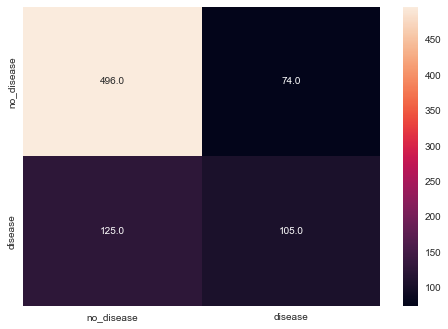

In [101]:
# confusion matrix
loo_confusion_matrix = pd.DataFrame(metrics.confusion_matrix(loo_actuals, loo_preds), columns = class_names, index = class_names)
sns.heatmap(loo_confusion_matrix, annot = True, fmt = '.1f')

<font color = red> \*** Answer here ***


The accuracy is 1 % worse here, although i believe this way to be a more conistent way to reach 75 % accuracy. In the 1st exercise we only trained one model with the basic split technique and reached mean accuracy with outliers varying from > 70 % accuracy to more than 80 %. I verified this with a few cell re-runs. The 1st run gave a 75 % accuracy, 2nd gave 75 % as well as the 3rd one. The accuracy varies greatly in the basic split -run, whereas here it's a consistent 75 %

____________
## <font color = forestgreen> 3. Model selection with leave-one-out cross validation

So far, we've trained one model at a time and I've given the value of k for you. Accuracy is what it is (no spoilers here), but could we still do a little better? Let's try that by <font color = darkorchid><b>hyperparameter tuning</b></font>.

This time, we're going to train multiple models, let's say 30, and choose the best K-Nearest Neighbors model among the others. Almost all models have some parameters that need to be chosen. As does the k-NN, I just happened to choose the k value of 3 for you. Note, k-NN has many other hyperparameters too, but for the sake of simplicity, this time we'll focus only on the nearest neighbors. 

Now, you're supposed to find that *optimal value* for k.

***Exercise 3***

Repeat the model performance estimation with values $k=1...30$ using again leave-one-out cross validation.

- Which value of k produces the best classification accuracy?
- If the number of k is still increased, what is the limit that the classification accuracy approaches? Why? 
- Can you say something about the performance of this selected model with new, unseen data? Explain, how you could you estimate the performance of this selected model.

*tip: `GridSearchCV` is a good class for this but will you get the other but the best k value out of it?*

In [110]:
### Code - Select best k

accuracies = list()
k_value = 1
# K-values from 1 to 30
while k_value <= 30:
    tuning_preds = list()
    tuning_test = list()
    # LOOCV with different k-values
    for train_idx, test_idx in loo_model.split(x_train):
        tuning_x_train, tuning_x_test = np.array(x_train)[train_idx], np.array(x_train)[test_idx]
        tuning_y_train, tuning_y_test = np.array(y_train)[train_idx], np.array(y_train)[test_idx]
        tuning_knn = KNeighborsClassifier(n_neighbors = k_value).fit(tuning_x_train, tuning_y_train.ravel())
        tuning_preds.append(tuning_knn.predict(tuning_x_test))
        tuning_test.append(tuning_y_test)
    # flatten data
    tuned_preds = [value for data in tuning_preds for value in data]
    tuned_actuals = [value for data in tuning_test for value in data]
    accuracies.append(metrics.accuracy_score(tuned_preds, tuned_actuals))
    k_value += 1


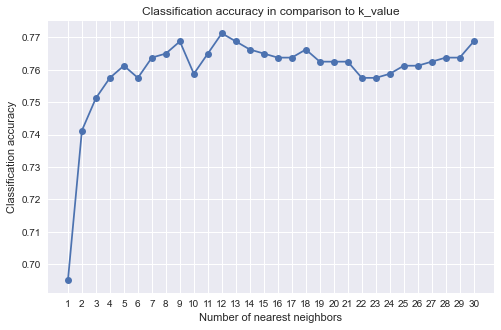

In [117]:
# results
plt.style.use('seaborn')
kx = list(range(1,31))
plt.figure(figsize = [8,5])
plt.plot(kx, accuracies, marker = "o")
plt.xticks(kx)
plt.title('Classification accuracy in comparison to k_value')
plt.xlabel('Number of nearest neighbors')
plt.ylabel('Classification accuracy')
plt.grid(True)
plt.show()

In [123]:
# get largest accuracy
largest_accuracy = max(accuracies)
# use the index + 1 to find k-value since we used a while-loop so index + 1 correctly corresponds to k-value
# +1 since the loop started at 1 whilst counting with indexes starts from 0
print(f"The optimal value for K is {accuracies.index(largest_accuracy) + 1} with the accuracy of {largest_accuracy:.2f} %")

The optimal value for K is 12 with the accuracy of 0.77 %


<font color = red> \*** Answer here ***

It'd seem that the maximum accuracy is around 76 to 77 % since we can't see any noticeable improvement or deprovement in accuracy as neighbors increase. If we were to go even higher i believe the boundaries of disease or no would get so blurred it'd be hard to distinct between them.

The performance of this model on new unseen data is hard to estimate, since the optimal value K is dependent on the size and type of data. 

________________
## <font color = red>  4. Testing with training data <font color = red> (this should *never* be done out of this exercise!) </font>

Oh, but what if we just used the ***whole data*** in training? Wouldn't we like to use as much data as possible to discover the underlying pattern in the data so why **not** to use the whole data?

*Never ever* do this out of this exercise. Why? Let's take a look.

***Exercise 4***

Repeat the previous task but use the whole data for training. Plot the resulting classification accuracy versus $k = 1...30$. Include the values from the previous task in the *same figure*.

- Comment your result and answer, why you should not test with training data?

In [127]:
### Code - Train with whole data

accuracies_2 = list()
k_value_2 = 1
# K-values from 1 to 30
while k_value_2 <= 30:
    tuning_preds_2 = list()
    tuning_test_2 = list()
    # LOOCV with different k-values
    for train_idx, test_idx in loo_model.split(x_train):
        tuning_x_train_2, tuning_x_test_2 = np.array(x_train), np.array(x_train)[test_idx]
        tuning_y_train_2, tuning_y_test_2 = np.array(y_train), np.array(y_train)[test_idx]
        tuning_knn_2 = KNeighborsClassifier(n_neighbors = k_value_2).fit(tuning_x_train_2, tuning_y_train_2.ravel())
        tuning_preds_2.append(tuning_knn_2.predict(tuning_x_test_2))
        tuning_test_2.append(tuning_y_test_2)
    # flatten data
    tuned_preds_2 = [value for data in tuning_preds_2 for value in data]
    tuned_actuals_2 = [value for data in tuning_test_2 for value in data]
    accuracies_2.append(metrics.accuracy_score(tuned_preds_2, tuned_actuals_2))
    k_value_2 += 1


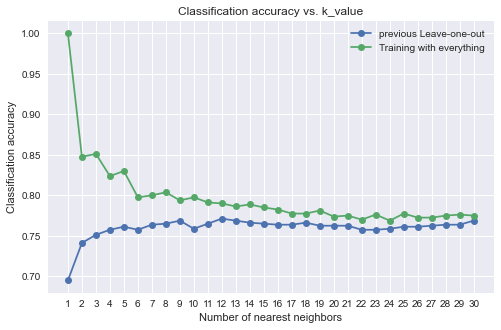

In [128]:
### Code - Plot results
kx = list(range(1,31))
fig = plt.figure(figsize = [8,5])
ax = plt.subplot(1,1,1)
ax.plot(kx, accuracies, marker = 'o', label = 'previous Leave-one-out')
ax.plot(kx, accuracies_2, marker = 'o', label = 'Training with everything')
plt.xticks(kx)
plt.title('Classification accuracy vs. k_value')
plt.xlabel('Number of nearest neighbors')
plt.ylabel('Classification accuracy')
plt.grid(True)
ax.legend()
plt.show()

 <font color = red> \*** Answer here ***

When we use all the data to train, there's effectively nothing new to the model. It just 'predicts' things it already knows. We effectively have no information on how it works on unseen data. It's like giving the same exam to study what you're going to use in the actual exam. 

_____________________

## <font color = darkorange> 5. Comparison of ridge regression and kNN regression </font>

The previous exercises were about classification. Now, we are ready to see another kind of supervised learning - regression. We're going to use <font color = darkorchid><b>Ridge Regression</b></font> and <font color = darkorchid><b>K-Nearest Neighbors Regression</b></font>, and compare the performances of these models.

To make this exercise more intuitively, let's change the data to another somewhat famous dataset called *The Boston Housing Dataset*. The Boston Housing Dataset is a derived from information collected by the U.S. Census Service concerning housing in the area of Boston, Massachusetts. Let's have a quick peek at the variables:

- **CRIM** - per capita crime rate by town
- **ZN** - proportion of residential land zoned for lots over 25,000 sq.ft.
- **INDUS** - proportion of non-retail business acres per town.
- **CHAS** - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
- **NOX** - nitric oxides concentration (parts per 10 million)
- **RM** - average number of rooms per dwelling
- **AGE** - proportion of owner-occupied units built prior to 1940
- **DIS** - weighted distances to five Boston employment centres
- **RAD** - index of accessibility to radial highways
- **TAX** - full-value property-tax rate per \$10,000
- **PTRATIO** - pupil-teacher ratio by town
- **B** - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
- **LSTAT** - % lower status of the population
- **MEDV** - Median value of owner-occupied homes in \$1000's


No worries if the variables don't make a lot of sense. However, the object is to predict **the median house value**. So the target variable is now <font color = darkorchid><b>MEDV</b></font> and all the others are <font color = darkorchid><b>features</b></font>.

There's the code chunk for loading data provided again. <font color = red>Again, the data file should be located in the same directory as this notebook file!</font>

In [4]:
### Loading code provided
# ------------------------------------------------------
# The data file should be at the same location than the 
# exercise file to make sure the following lines work!
# Otherwise, fix the path.
# ------------------------------------------------------

# Data path
data_path = 'ex2_boston_housing_data.csv'

# Load the data 
boston_data = pd.read_csv(data_path, dtype='float')

In [5]:
# extract features as an array
regression_features = list(boston_data[[column for column in boston_data.columns if column != 'MEDV']])

# extract target variable as an array
regression_labels = ['MEDV']

In [6]:
display(regression_features)
display(regression_labels)

['CRIM',
 'ZN',
 'INDUS',
 'CHAS',
 'NOX',
 'RM',
 'AGE',
 'DIS',
 'RAD',
 'TAX',
 'PTRATIO',
 'B',
 'LSTAT']

['MEDV']

-----------

With regression, we can examine **the relationship between two or more variables**. This relationship is represented by an *equation*, which itself represents how much y changes with any given change of x. So for example, we could use *age* as an independent variable to predict *height* (a dependent variable). 

We start by looking at the relationships between the variables in the given dataset.


***Exercise 5 A)***

Make scatter plots where you present each feature versus the target variable `MEDV`.

- What can you say about the relationships?

*tip: seaborn.pairplot is quite a handy function where you can set x_vars and y_vars to point out the variables you need*

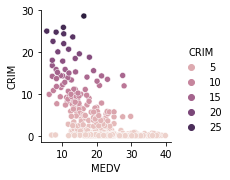

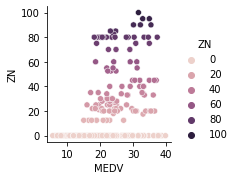

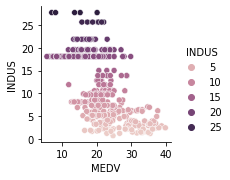

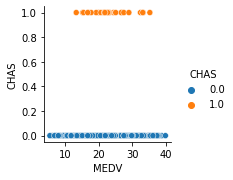

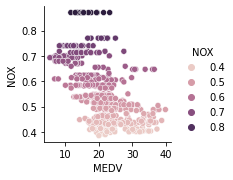

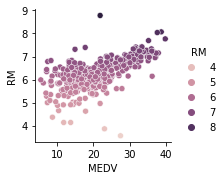

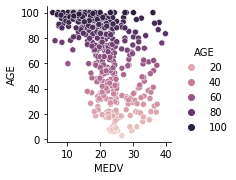

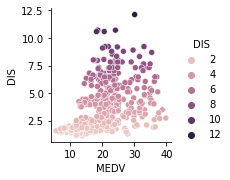

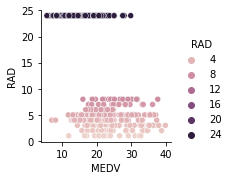

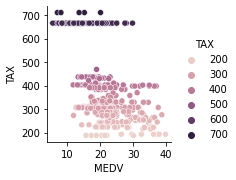

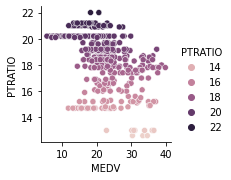

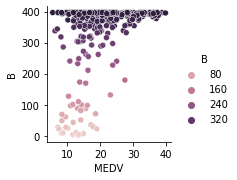

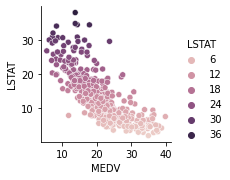

In [7]:
### Code - Scatter plots
for feature in regression_features:
    sns.pairplot(data = boston_data, x_vars = 'MEDV', y_vars = feature, hue = feature)

<font color = red>\*** Answer here - the relationships *** </font> 

Well surprisingly enough, it'd seem that the less there's crime the higher the median of owner-occupied homes -- the richer the less crime.
Also, on average, the further away from employment centers, the wealthier. 
It'd also seem  that the larger the Pupil-teacher -ratio, the wealther people

------

We are about to compare two different regression models. We need to be sure that both are *the best models* among the other trained models. But to make sure that these selected models really are the best ones, we're going to use a combination of cross-validation and hyperparameter tuning right away. What's the other way to ensure that the chosen hyperparameters are appropriate for the given data?

For the k-Nearest neighbors, we have previously get familiar with the optimization of the k value. Let's continue with this value to find the *optimal k* for the k-nearest neighbors regression too. With ridge regression, we have this hyperparameter called $\lambda$ (read as 'lambda'). We'll use this parameter for model selection.


To compare the models, let's use a loss function called <font color = darkorchid><b>mean absolute error (MAE)</b></font>. 



***Exercise 5 B)***

Do you need to prepare the data a little? Explain your decision.

In [8]:
### Code - Preparation
boston_data.describe().T # we should probably scale the features

,count,mean,std,min,25%,50%,75%,max
CRIM,467.0,2.859473,5.204950,0.00632,0.0821,0.22876,3.504645,28.6558
ZN,467.0,10.825482,22.435436,0.00000,0.0000,0.00000,12.500000,100.0000
INDUS,467.0,11.178758,6.810618,0.74000,5.1900,9.69000,18.100000,27.7400
CHAS,467.0,0.059957,0.237662,0.00000,0.0000,0.00000,0.000000,1.0000
NOX,467.0,0.554025,0.117089,0.38500,0.4490,0.53800,0.624000,0.8710
RM,467.0,6.203176,0.591121,3.56100,5.8795,6.16900,6.539000,8.7800
AGE,467.0,68.283084,28.062858,2.90000,44.7000,76.70000,93.850000,100.0000
DIS,467.0,3.861389,2.113944,1.13700,2.1223,3.31750,5.266000,12.1265
RAD,467.0,9.400428,8.657791,1.00000,4.0000,5.00000,24.000000,24.0000
TAX,467.0,407.528908,167.120323,187.00000,281.0000,330.00000,666.000000,711.0000


In [9]:
# exclude CHAS since it seems to be a binary valyue
boston_numeric_features = [column for column in regression_features if column != 'CHAS']
boston_numeric_features

['CRIM',
 'ZN',
 'INDUS',
 'NOX',
 'RM',
 'AGE',
 'DIS',
 'RAD',
 'TAX',
 'PTRATIO',
 'B',
 'LSTAT']

In [13]:
# scale numeric features
boston_data[boston_numeric_features] = scale(boston_data[boston_numeric_features])

In [14]:
#verify
display(boston_data[regression_features].head())
display(boston_data[regression_labels])

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,-0.548749,0.320128,-1.303592,0.0,-0.137008,0.629691,-0.109981,0.108260,-0.971314,-0.668073,-1.593889,0.439740,-1.175095
1,-0.544712,-0.483035,-0.603934,0.0,-0.726934,0.368889,0.378732,0.523617,-0.855688,-0.991540,-0.379700,0.439740,-0.569140
2,-0.544716,-0.483035,-0.603934,0.0,-0.726934,1.662736,-0.256239,0.523617,-0.855688,-0.991540,-0.379700,0.394323,-1.313474
3,-0.543739,-0.483035,-1.322701,0.0,-0.820980,1.346048,-0.802028,1.042209,-0.740061,-1.111342,0.057407,0.414409,-1.472246
4,-0.536684,-0.483035,-1.322701,0.0,-0.820980,1.598382,-0.502379,1.042209,-0.740061,-1.111342,0.057407,0.439740,-1.124113


,MEDV
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2
...,...
462,22.4
463,20.6
464,23.9
465,22.0


<font color = red>\*** Answer here *** </font> 

Ridge Regression and KNN both require scaling

In [27]:
# split into training data
x_train_r, x_test_r, y_train_r, y_test_r = train_test_split(boston_data[regression_features], boston_data[regression_labels], test_size = 0.2)

------

***Exercise 5 C)***

Then, train a ridge regression model  and a k-NN regression model. For hyperparameters, use $\lambda=2^{-10}...2^{10}$ and $k=1...30$. Once again, use leave-one-out cross validation.

- What are the total performances of each model and how they compare with each other? 
- What does the MAE tell you about the performances of your models and in general?

*note: In a `sklearn.linear_model.Ridge` class, lambda is called alpha so don't get confused*

In [28]:
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_absolute_percentage_error as mape

In [29]:
loo_model = LeaveOneOut()

In [30]:
### Code - Ridge regression and k-NN regression

## k-NN regressor
knn_errors = list()

#K_values from 1 to 30
k_value_r = 1
while k_value_r <= 30:
    predicted_labels_r = list()
    actual_labels_r = list()
    # LOOCV with different k-values
    for train_idx, test_idx in loo_model.split(x_train_r):
        regr_x_train, regr_x_test = np.array(x_train_r)[train_idx], np.array(x_train_r)[test_idx]
        regr_y_train, regr_y_test = np.array(y_train_r)[train_idx], np.array(y_train_r)[test_idx]
        regr_knn = KNeighborsRegressor(n_neighbors = k_value_r).fit(regr_x_train, regr_y_train.ravel())
        predicted_labels_r.append(regr_knn.predict(regr_x_test))
        actual_labels_r.append(regr_y_test)
    r_preds = [value for data in predicted_labels_r for value in data]
    r_actuals = [value for data in actual_labels_r for value in data]
    knn_errors.append(mae(r_preds, r_actuals))
    k_value_r += 1
    
    
    

In [31]:
# Ridge

ridge_errors = list()
# lambda from 2**-10 to 2**10
ridge_alpha = -10
while ridge_alpha <= 10:
    ridge_preds = list()
    ridge_actuals = list()
    for train_idx, test_idx in loo_model.split(x_train_r):
        ridge_x_train, ridge_x_test = np.array(x_train_r)[train_idx], np.array(x_train_r)[test_idx]
        ridge_y_train, ridge_y_test = np.array(y_train_r)[train_idx], np.array(y_train_r)[test_idx]
        ridge_model = Ridge(alpha = pow(2,ridge_alpha)).fit(ridge_x_train, ridge_y_train)
        ridge_preds.append(ridge_model.predict(ridge_x_test))
        ridge_actuals.append(ridge_y_test)
    ridge_preds_ = [value for data in ridge_preds for value in data]
    ridge_actuals_ = [value for data in ridge_actuals for value in data]
    ridge_errors.append(mae(ridge_preds_, ridge_actuals_))
    ridge_alpha += 1


In [32]:
# total performance
best_perf_ridge = min(ridge_errors)
best_perf_knn = min(knn_errors)

print(f"The smallest MAE for k_NN was {best_perf_knn:.2f} whilst Ridge reached a MAE of {best_perf_ridge:.2f}")

The smallest MAE for k_NN was 2.18 whilst Ridge reached a MAE of 2.57


<font color = red>\*** Answer here - discuss your results (comparison and MAE) ***</font>

In [187]:
boston_data['MEDV'].head(2)

0    24.0
1    21.6
Name: MEDV, dtype: float64

Ridge reached a MAE of 2.4, whilst KNN got to 2.13 so when the Boston data MEDV is rounded to 1000's, as shown above. So if Ridge predicts a house price to be 25k, it's actually somewhere between 22,6k and 27,4k. 

MAE tells the mean absolute error value in a dataset, so how far, on average, the prediction is from actual. 
About the model in general it's an ok metric to use although I'd probably enrich it with MAPE which tells how accurate the model is with percentages. MAE helps explain model prediction accuracy in plain terms

------

We can say something about the performance now. One way to do the visualization is to plot actual labels vs predicted labels. Let's do that.


***Exercise 5 D)***

Using the best models found in the previous exercise, plot the actual labels vs. predicted labels. 

- How did the selected models perform?
- In an ideal situation, where should the data points be located?

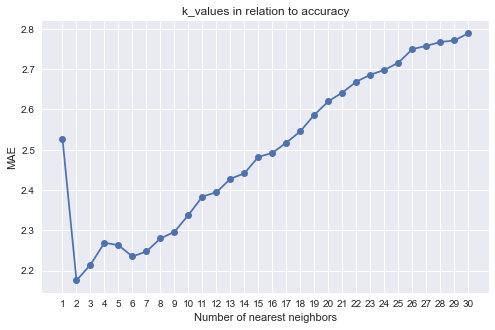

In [35]:
# results knn
plt.style.use('seaborn')
kx = list(range(1,31))
plt.figure(figsize = [8,5])
plt.plot(kx, knn_errors, marker = "o")
plt.xticks(kx)
plt.title('k_values in relation to accuracy')
plt.xlabel('Number of nearest neighbors')
plt.ylabel('MAE')
plt.grid(True)
plt.show()

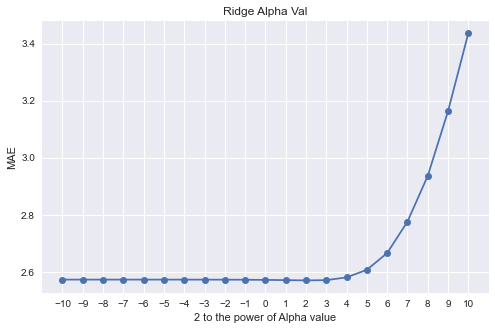

In [40]:
# results
plt.style.use('seaborn')
kx = list(range(-10,11))
plt.figure(figsize = [8,5])
plt.plot(kx, ridge_errors, marker = "o")
plt.xticks(kx)
plt.title('Ridge Alpha Val')
plt.xlabel('2 to the power of Alpha value')
plt.ylabel('MAE')
plt.grid(True)
plt.show()

In [41]:
# extract best parameters 

print(f"The optimal k value for Knn is 2 with the MAE of {min(knn_errors):.2f}")
print(f"The optimal alpha value for Ridge is -10 - 3 with the MAE of {min(ridge_errors):.2f}")

The optimal k value for Knn is 2 with the MAE of 2.18
The optimal alpha value for Ridge is -10 - 3 with the MAE of 2.57


In [47]:
### Code - Plot actual vs predicted labels
best_ridge = Ridge(alpha = pow(2, -10))
best_ridge.fit(x_train_r, y_train_r)
ridge_pred = best_ridge.predict(x_test_r)


In [43]:
best_knn = KNeighborsRegressor(n_neighbors = 2).fit(x_train_r, y_train_r)
knn_pred = best_knn.predict(x_test_r)

<font color = red> \*** Answer here ***

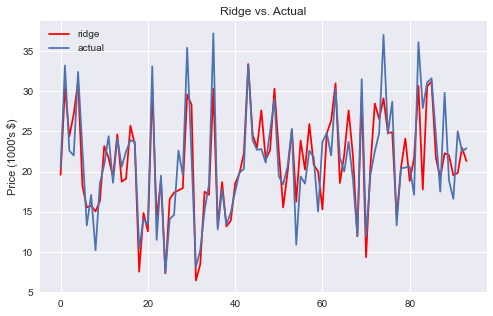

In [48]:
# ridge vs actual
fig = plt.figure(figsize = [8,5])
ax = plt.subplot(1,1,1)
ax.plot(ridge_pred, label = 'ridge', color = 'r')
ax.plot(y_test_r.values, label = 'actual')
plt.title('Ridge vs. Actual')
plt.ylabel('Price (1000\'s $)')
plt.grid(True)
ax.legend()
plt.show()

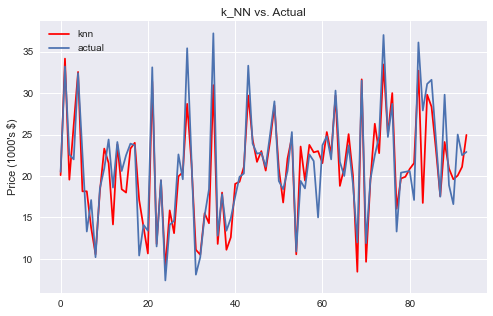

In [45]:
# knn vs actual
fig = plt.figure(figsize = [8,5])
ax = plt.subplot(1,1,1)
ax.plot(knn_pred, label = 'knn', color = 'r')
ax.plot(y_test_r.values, label = 'actual')
plt.title('k_NN vs. Actual')
plt.ylabel('Price (1000\'s $)')
plt.grid(True)
ax.legend()
plt.show()

In [49]:
# performance metrics: 
print(f"MAE for k_NN was {mae(knn_pred, y_test_r.values):.2f}")
print(f"MAE for Ridge was {mae(ridge_pred, y_test_r.values):.2f}")

knn_mape = mape(knn_pred, y_test_r.values)
ridge_mape = mape(ridge_pred, y_test_r.values)

print(f"KNN reached an accuracy of {100 - knn_mape * 100:.2f} %")
print(f"Ridge reached an accuracy of {100 - ridge_mape * 100:.2f} %")

MAE for k_NN was 2.05
MAE for Ridge was 2.50
KNN reached an accuracy of 89.09 %
Ridge reached an accuracy of 87.46 %


________________
## <font color = dimgrey> BONUS: Feature selection - most useful features in predicting the disease </font>

You can stop here and get the "pass" grade! To get the "pass with honors" grade, you need to do the following exercise. This means you'll get one bonus point for the exam.

The exercise is not as straightforward as the previous ones, and may require you to do some research of your own. You are also required to **explain** the steps you choose with your own words, and show that you tried to understand the idea behind the task. There's no single correct solution for this so just explain me what you did and why you did it.

----------------


Unfortunately, due to the lack of resources and time, doctors are not able to measure all the values represented in the given dataset. Luckily, keen students are ready to help: You should now find <font color = darkorchid><b>five [5] most useful features</b></font> in predicting the presence of the cardiovascular disease among the ones in the given cardio data set. 

Use the selected features to train and test a model of your choice. Evaluate the performance by computing the accuracy and drawing a ROC curve. Remember not to use any information from the test set when selecting the features!

**Discuss** your results.

In [24]:
### Code - BONUS!

<font color = red> \*** Answer here *** </font>